In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
from sklearn.model_selection import cross_validate
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# OSEMN Pipleline

###### O -Obtaining our data
###### S- Scrubbing/ Cleaning our data
###### E-Exploring / Visualizing our data will allow us to find patterns and trends
###### M- Modelling our data will give us our prediction power as a wizard
###### N- Interpreting our data

## Data Preprocessing

In [78]:
df = pd.DataFrame(pd.read_csv("diabetes.csv"))

**DataFrame.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excliding NaN values. This Method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's undersatnd the statistics that are generated by the describe() method.
* count tells us the number of NaN-emplty rows in a feature.
* mean tell us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum Value of that feature.
* 25%, 50% and 75% are the percentile/quartile of each features. This quartile
* information helps us to detect Outlies.
* max tells the maximum value of that feature.



In [20]:
# displaying the head of dataset
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [21]:
# description of dataset
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [22]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
#768 rows and 9 columns
df.shape

(768, 9)

In [25]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [26]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [28]:
# checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [30]:
df.isnull().all()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [31]:
# It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values
df_new = df.copy(deep = True)
df_new[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_new[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)


## showing the count of Nans
print(df_new.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [32]:
# Listing of largest values for that field
df.nlargest(10,['BloodPressure'])

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
106            1       96            122              0        0  22.4   
691           13      158            114              0        0  42.3   
43             9      171            110             24      240  45.4   
177            0      129            110             46      130  67.1   
549            4      189            110             31        0  28.5   
84             5      137            108              0        0  48.8   
362            5      103            108             37        0  39.2   
658           11      127            106              0        0  39.0   
662            8      167            106             46      231  37.6   
672           10       68            106             23       49  35.5   

     DiabetesPedigreeFunction  Age  Outcome  
106                     0.207   27        0  
691                     0.257   44        1  
43                      0.721   54        1  
177                     0.319   26        1  
549                     0.680   37        0  
84                      0.227   37        1  
362                     0.305   65        0  
658                     0.190   51        0  
662                     0.165   43        1  
672                     0.285   47        0

In [35]:
#Standardize the variables
df_new = df.std()

In [36]:
df_new

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [37]:
df_new.mean()

22.92743279787282

In [38]:
df_new.std()

36.0792507611304

In [39]:
df_new.isnull().any()

False

# Exploratory Data Analysis

In [40]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

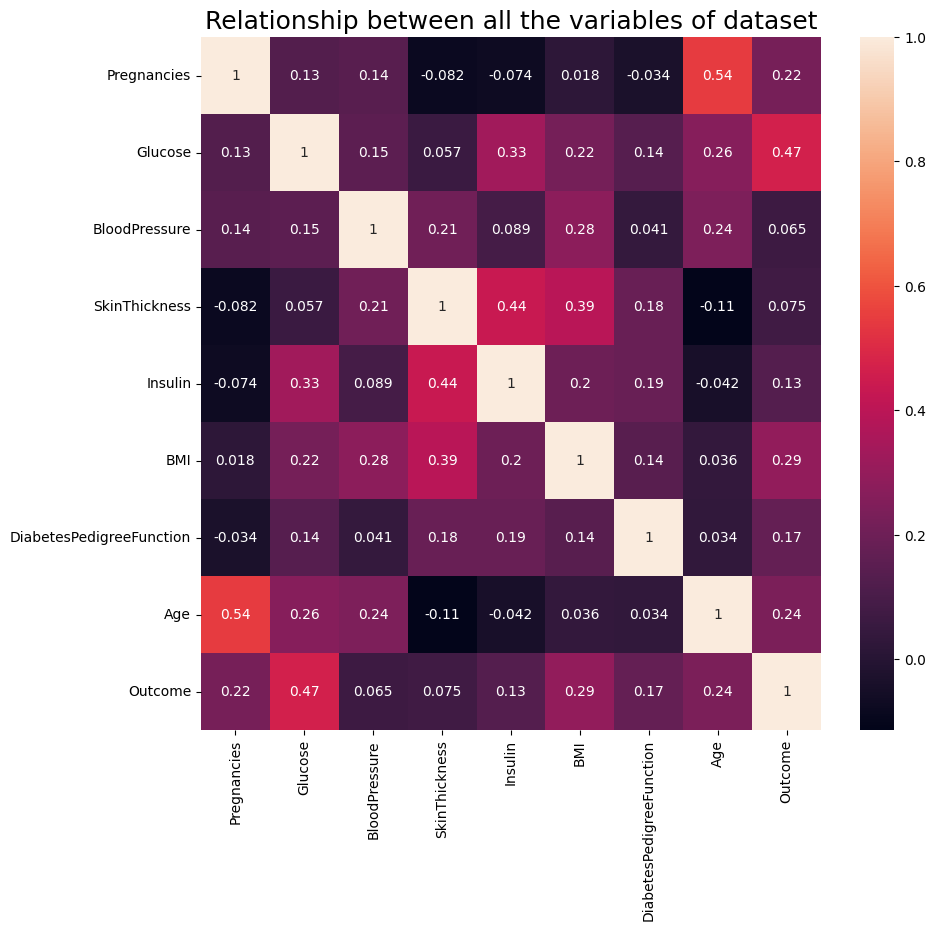

In [43]:
# **Heat maop** is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize  simple or complex information.
#Correlation
# we can see skin thickness, insulin, pregnancies and age are full independent to each other
# age and pregnancies has negative correlation
plt.figure(figsize=(10, 9))
sns.heatmap(df.corr(), annot=True)
plt.title("Relationship between all the variables of dataset", fontsize=18)
plt.show()

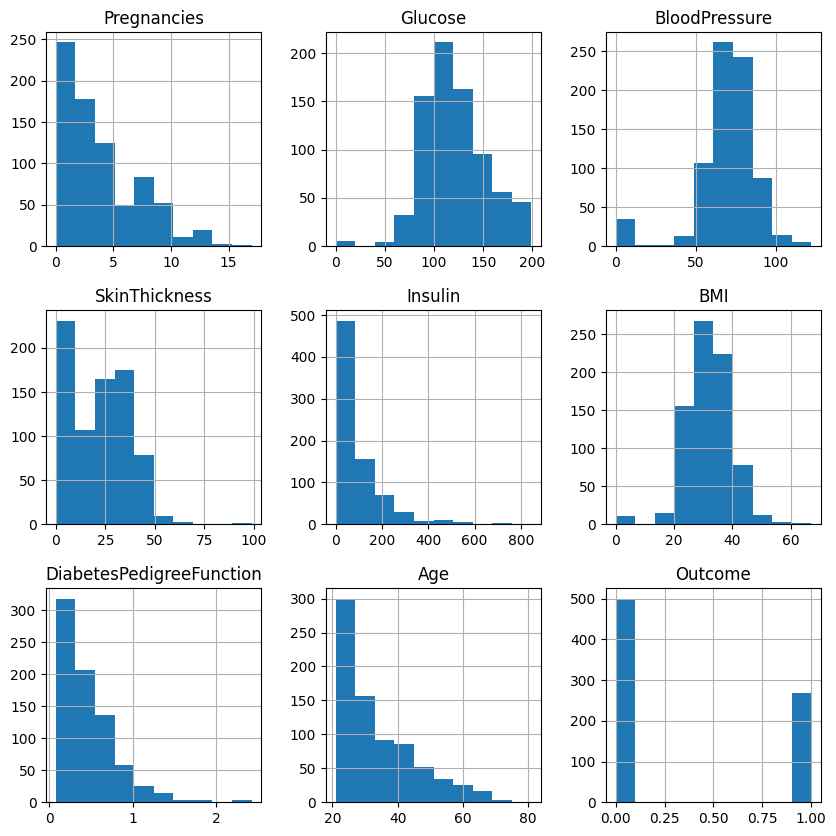

In [44]:
# Histogram
df.hist(figsize=(10,10))
plt.show()

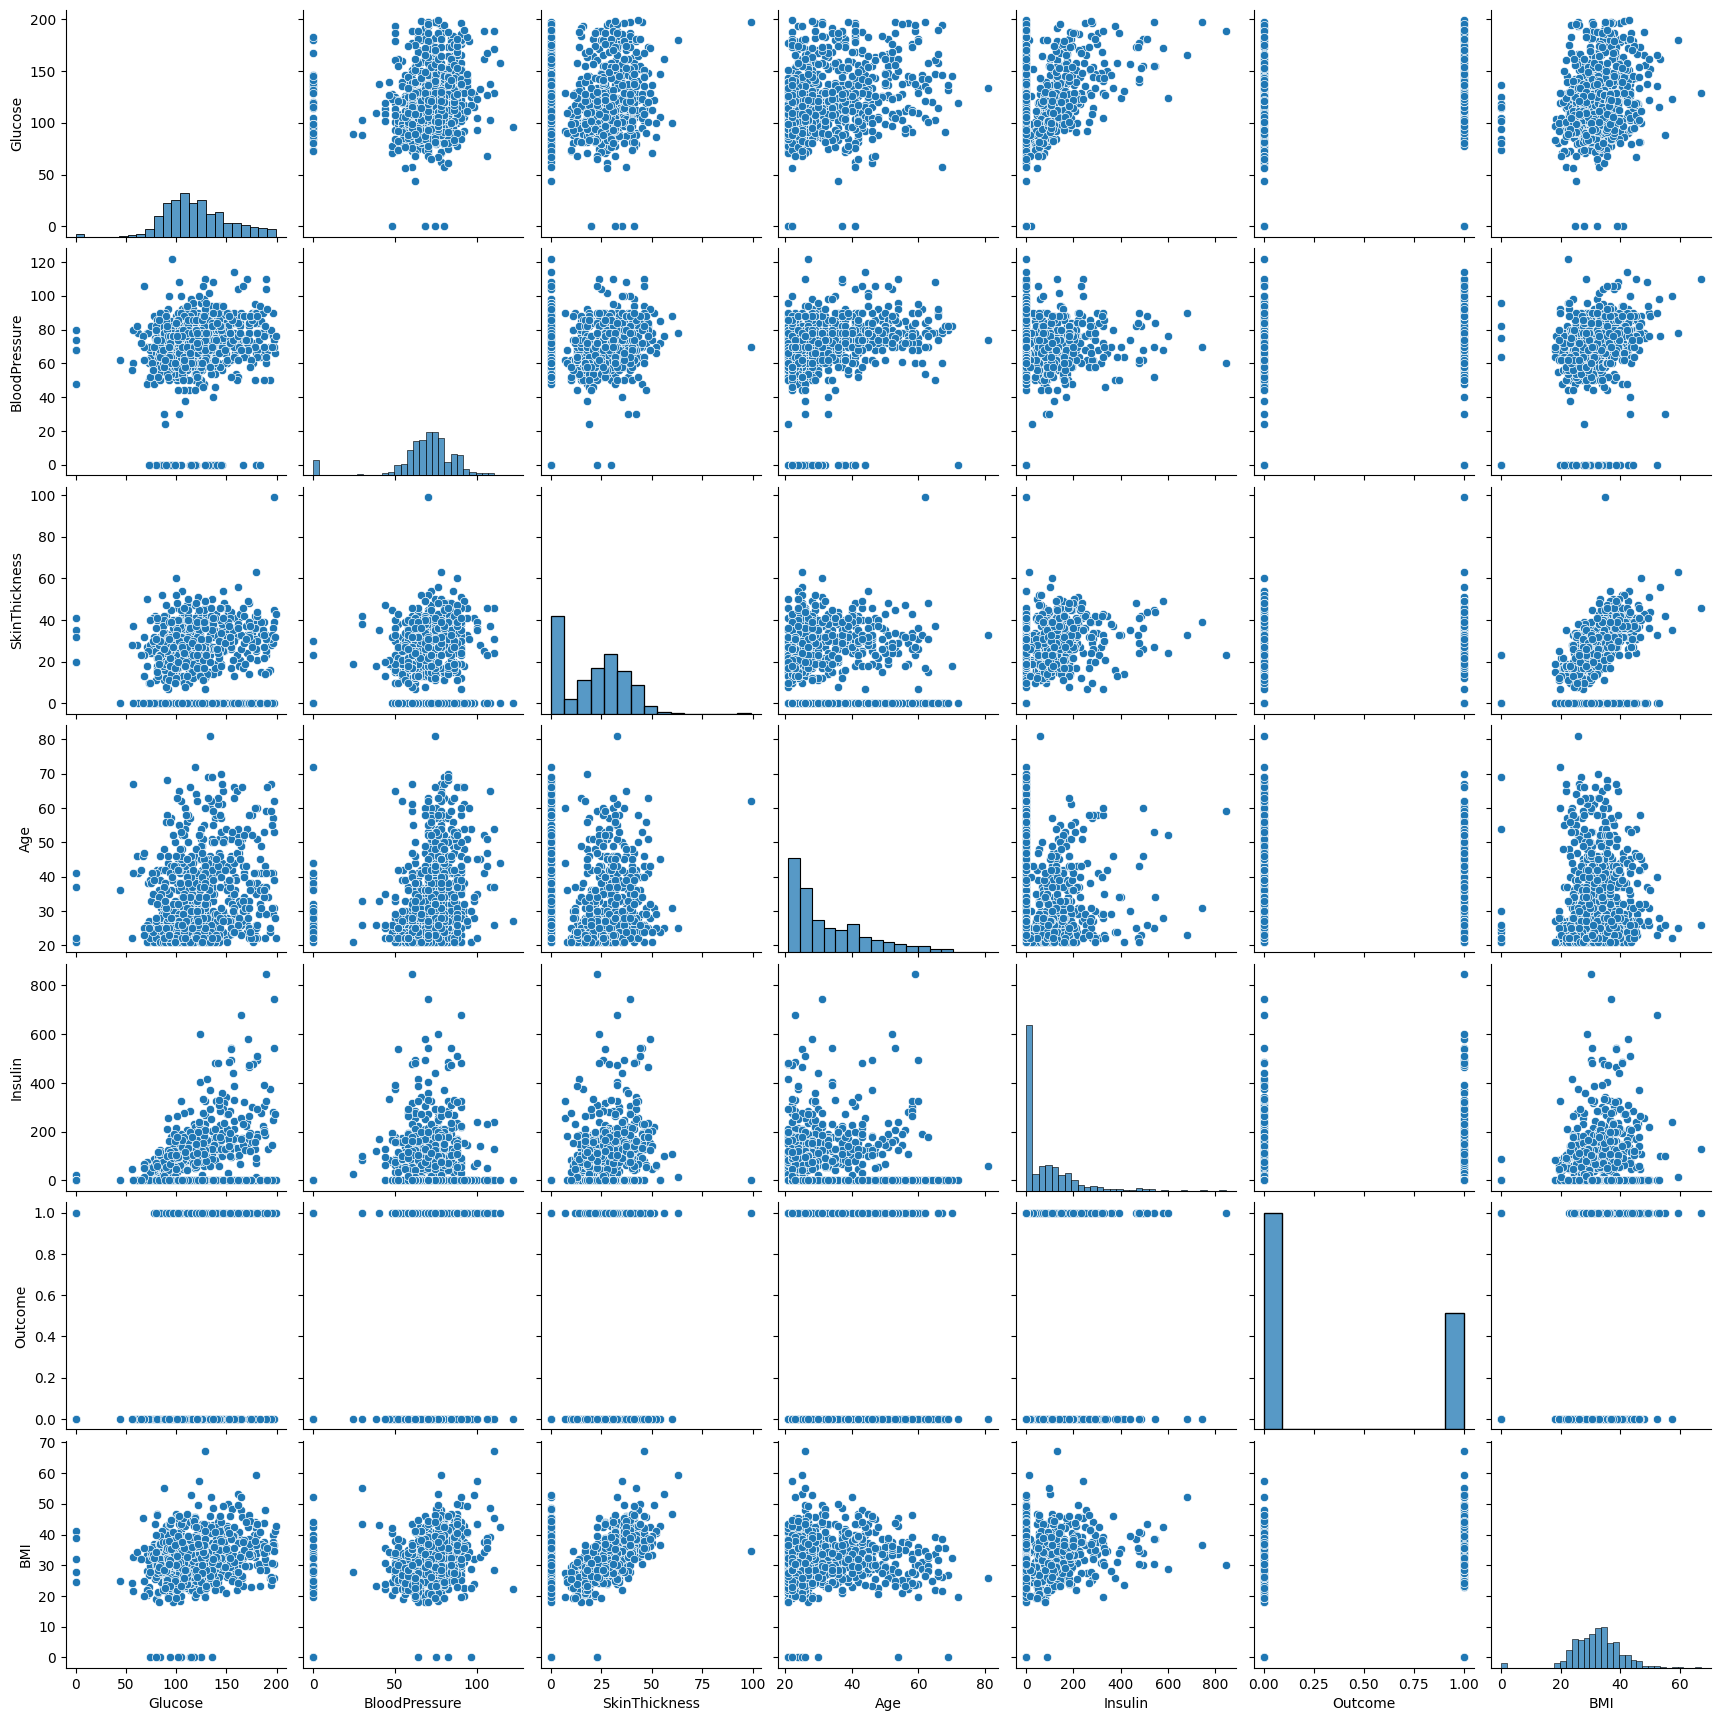

In [45]:
#pairplot 
mean_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Age', 'Insulin', 'Outcome', 'BMI']
sns.pairplot(df[mean_col], palette = 'Accent')

<AxesSubplot: xlabel='BMI', ylabel='Glucose'>

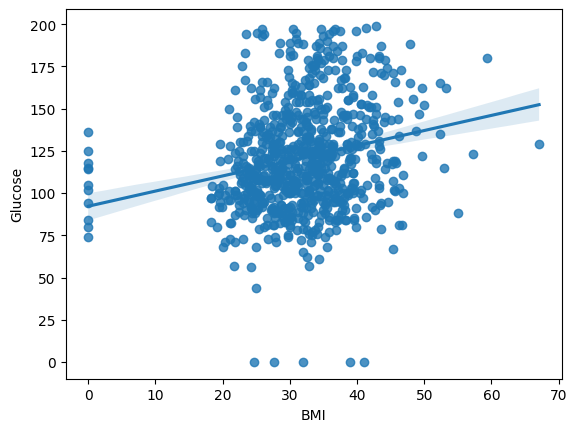

In [46]:
sns.regplot(x='BMI', y='Glucose', data=df)

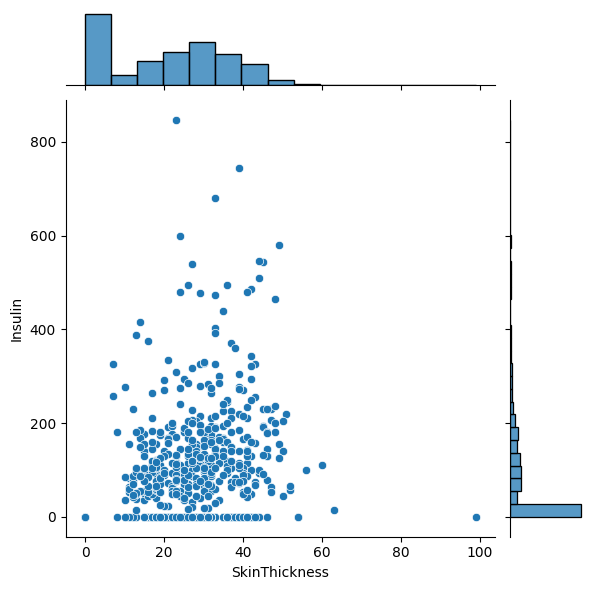

In [47]:
#Scatterplot
sns.jointplot(x='SkinThickness', y='Insulin', data=df)

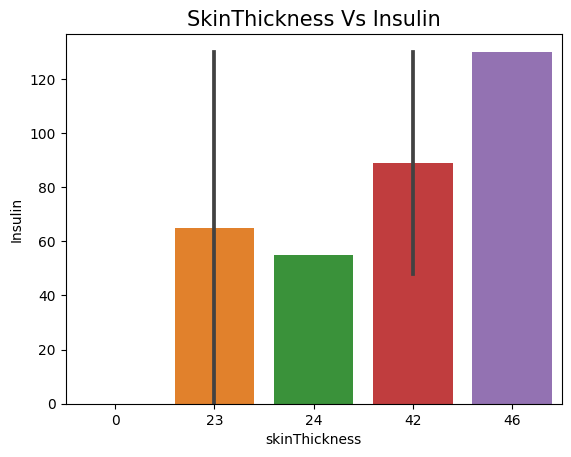

In [48]:
#barplot
sns.barplot(x='SkinThickness', y='Insulin', data=df[170:180])
plt.title("SkinThickness Vs Insulin", fontsize=15)
plt.xlabel("skinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

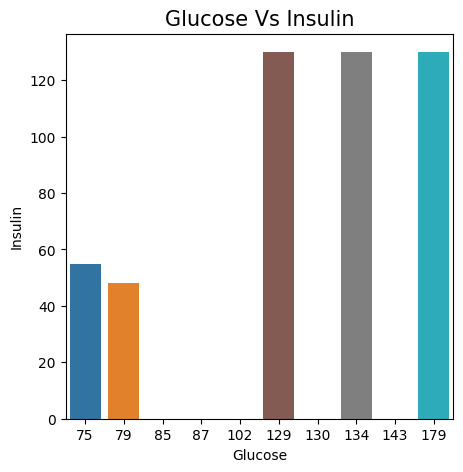

In [49]:
#barplot
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x='Glucose', y='Insulin', data=df[170:180])
plt.title("Glucose Vs Insulin", fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

<AxesSubplot: xlabel='count', ylabel='Outcome'>

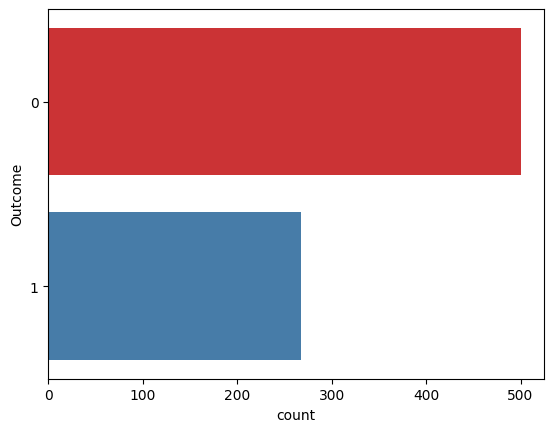

In [50]:
#lets count total outcome in each target 0 1
# 0 means no diabetes
#1 means patient with diabetes
sns.countplot(y=df['Outcome'], palette='Set1')

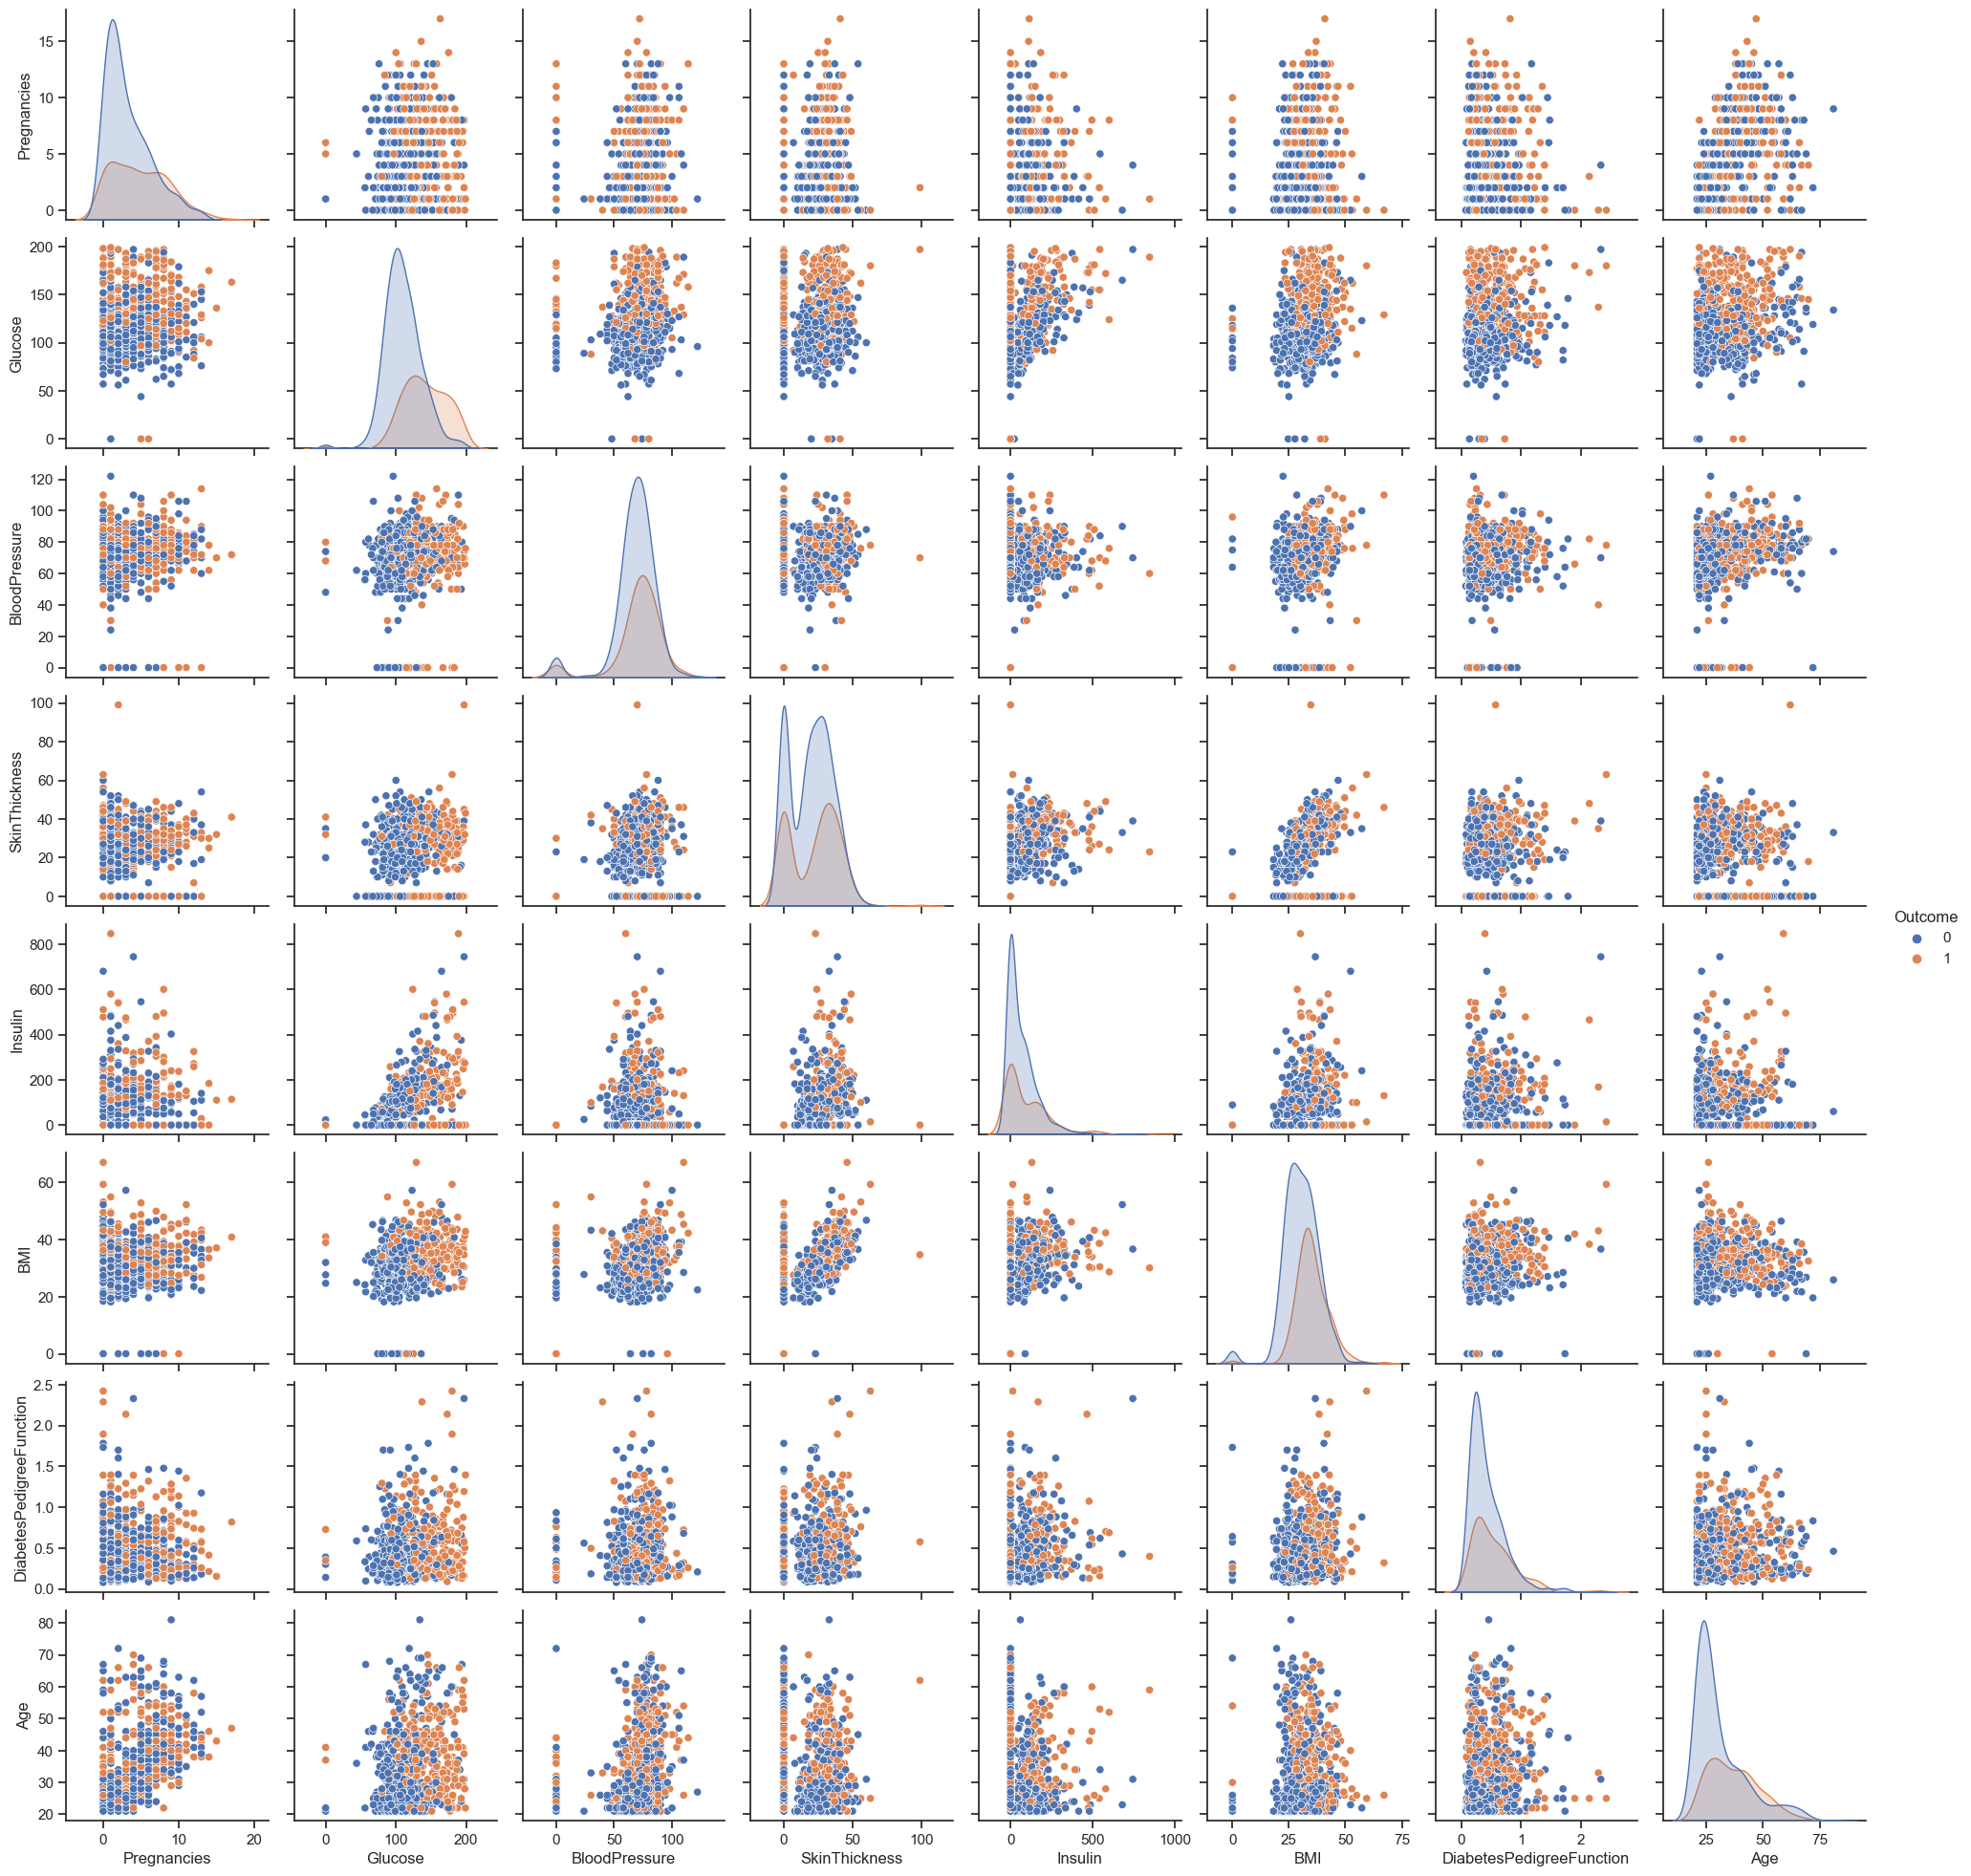

In [51]:
sns.set(style="ticks")
sns.pairplot(df, hue='Outcome')

<AxesSubplot: >

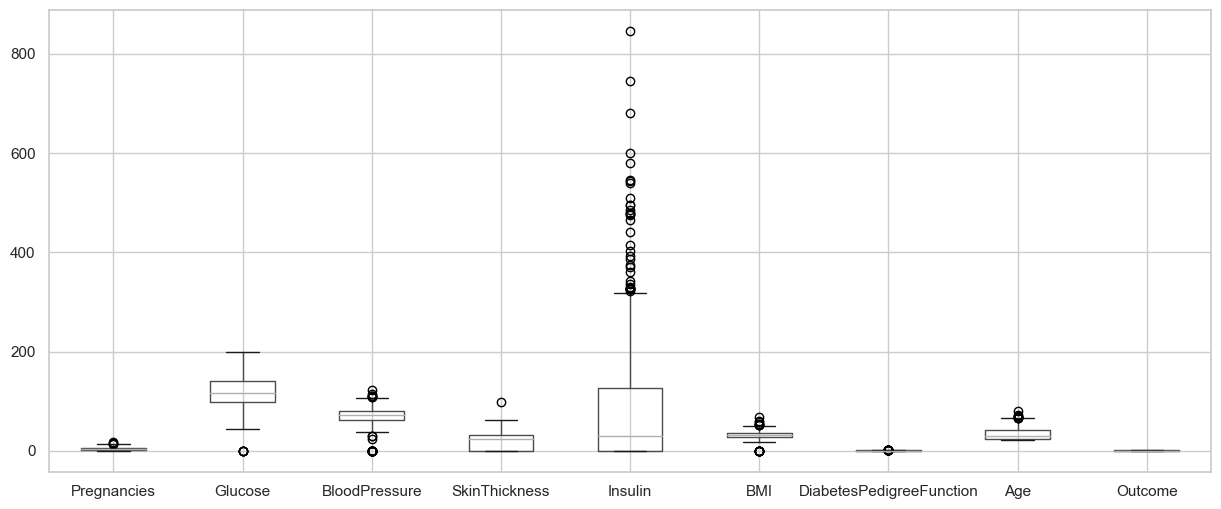

In [52]:
# box plot for outline visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

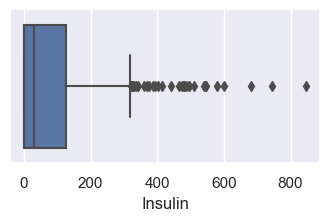

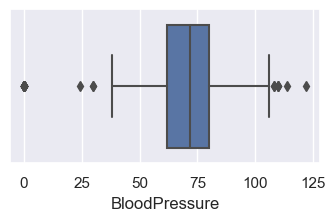

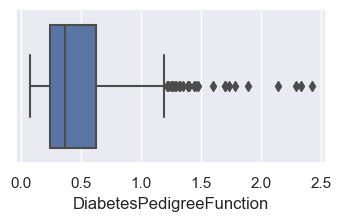

In [53]:
# box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

In [54]:
# outlier remove
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n", Q1)
print("\n---Q3--- \n", Q3)
print("\n---IQR---\n", IQR)

#print((df <(Q1 - 1.5 * IQR))|(df > (Q3 +1.5 * IQR)))


---Q1--- 
 Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigr

In [55]:
# outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape, df_out.shape
#more than 80 recoreds deleted

((768, 9), (639, 9))

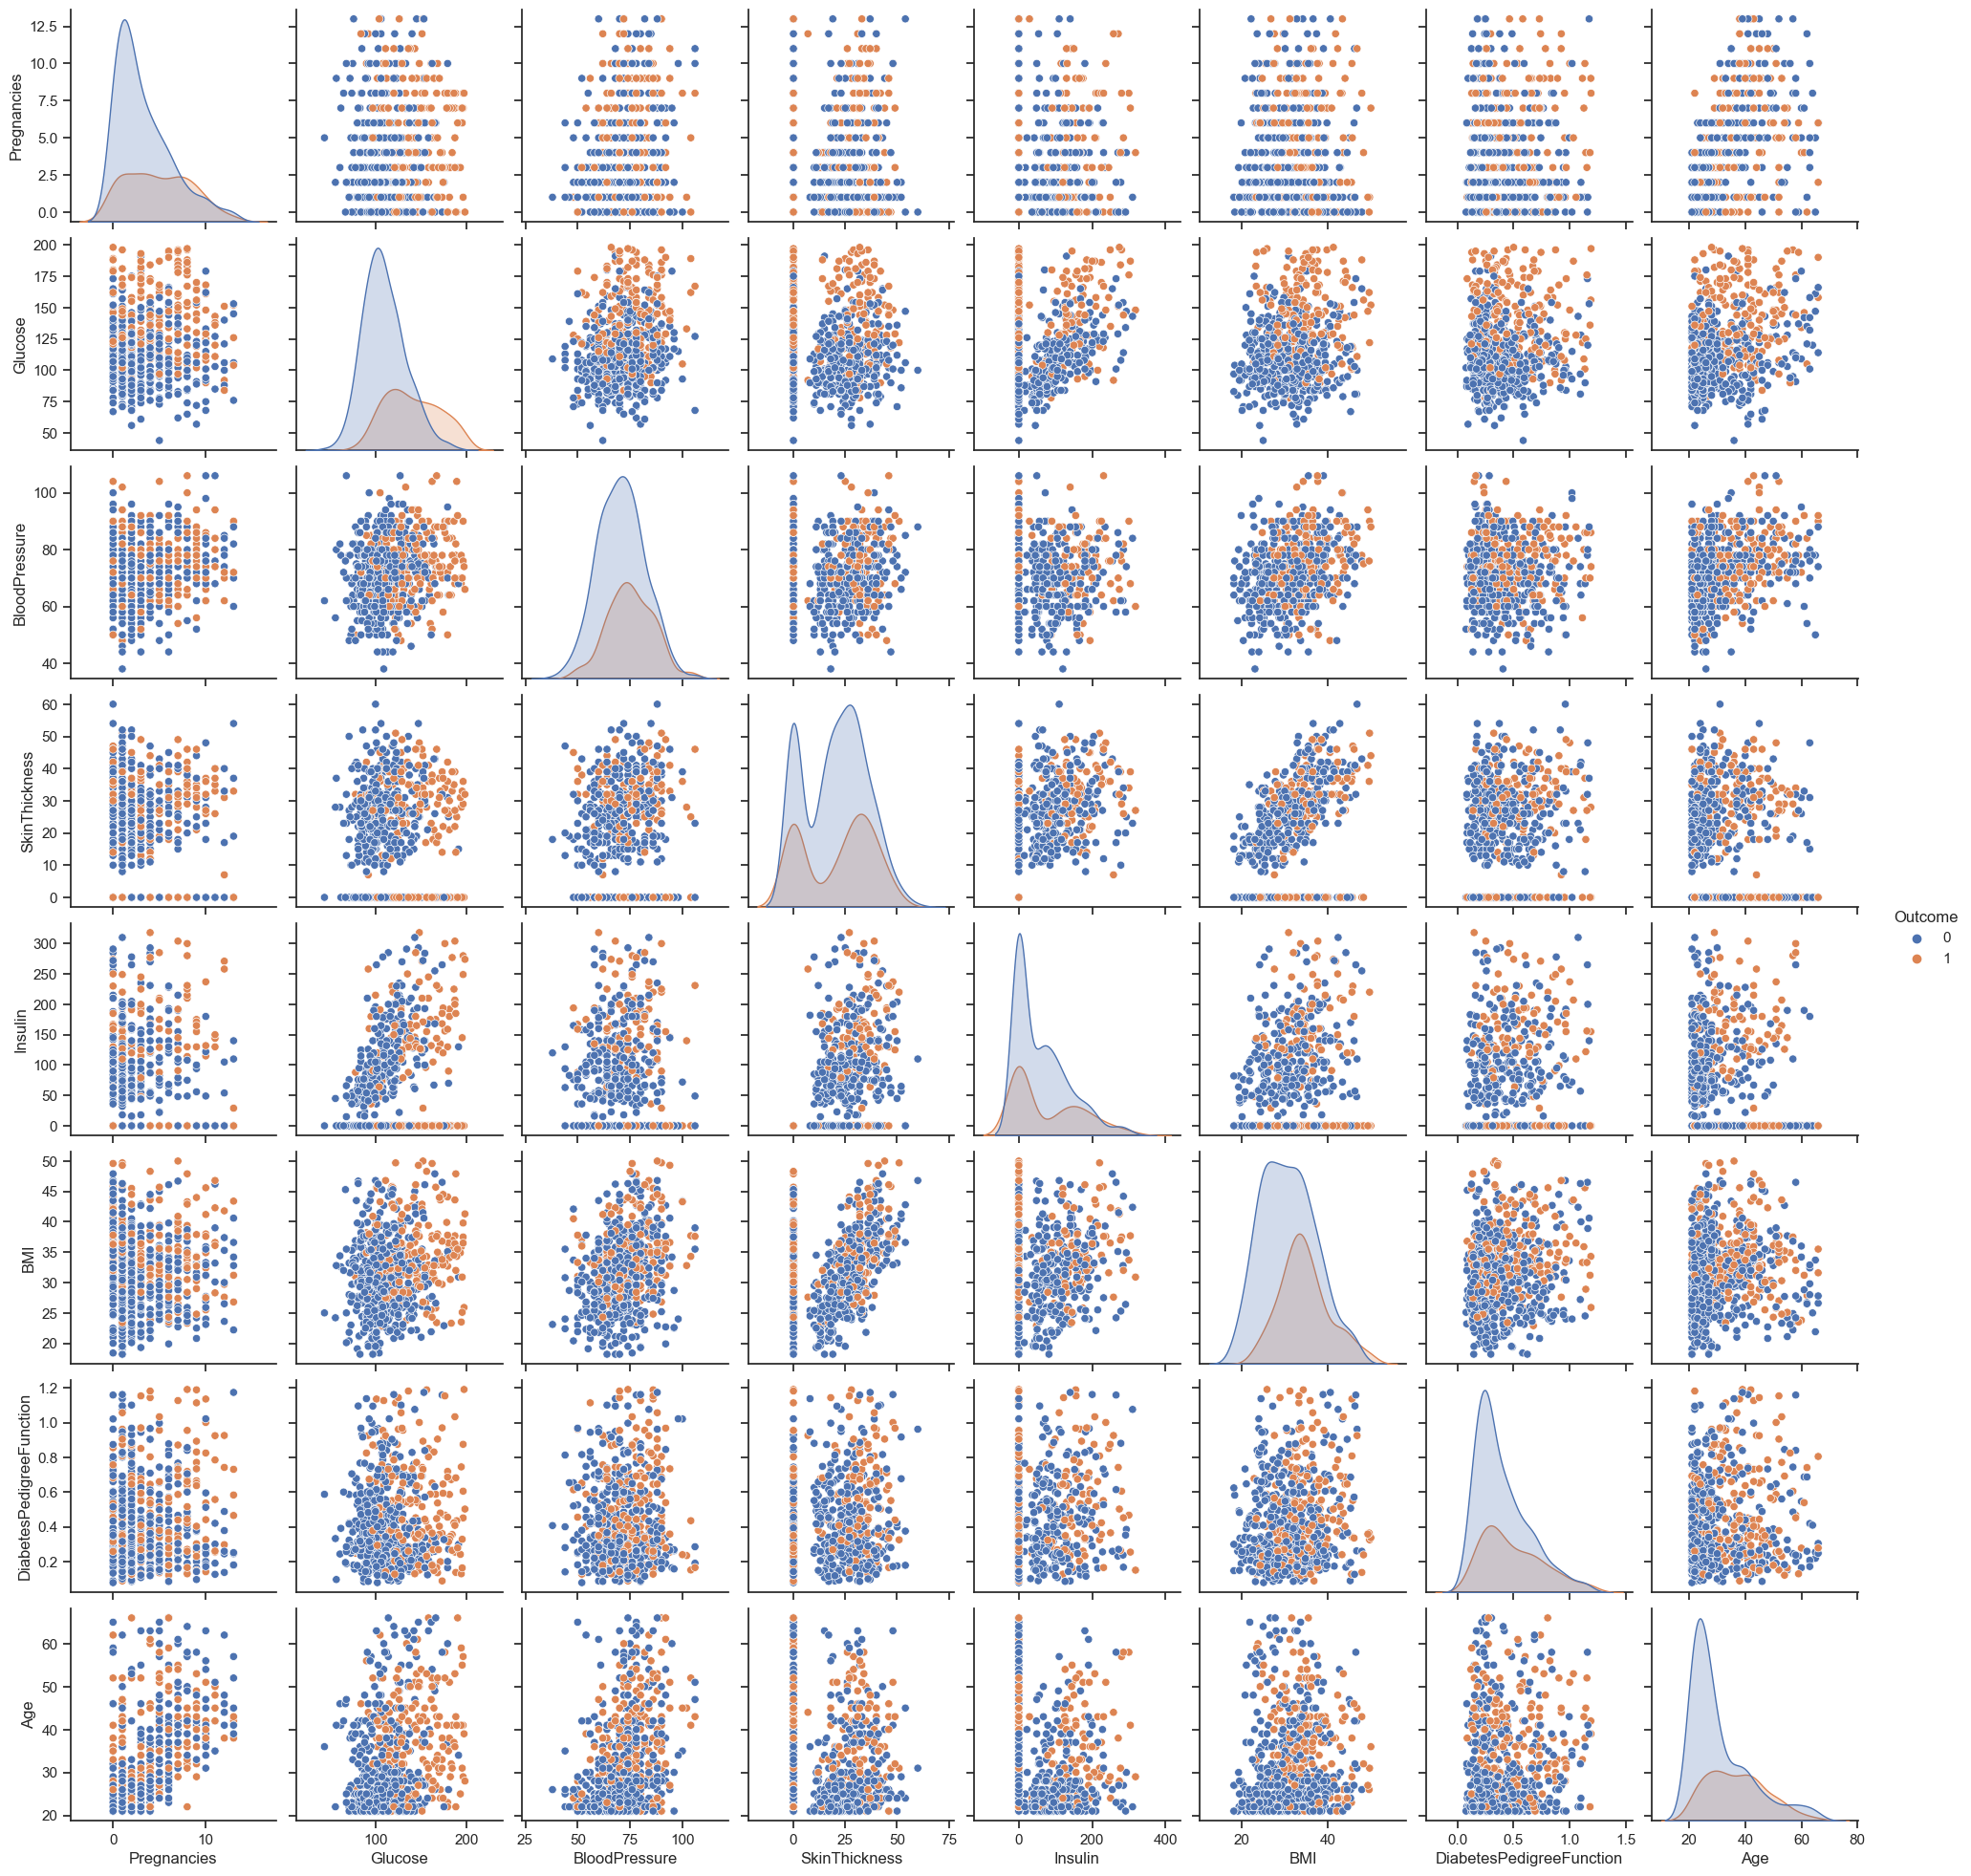

In [57]:
# Scatter matrix after removing outlier
sns.set(style='ticks')
sns.pairplot(df_out, hue="Outcome")
plt.show()

Text(0, 0.5, 'Count of Patients')

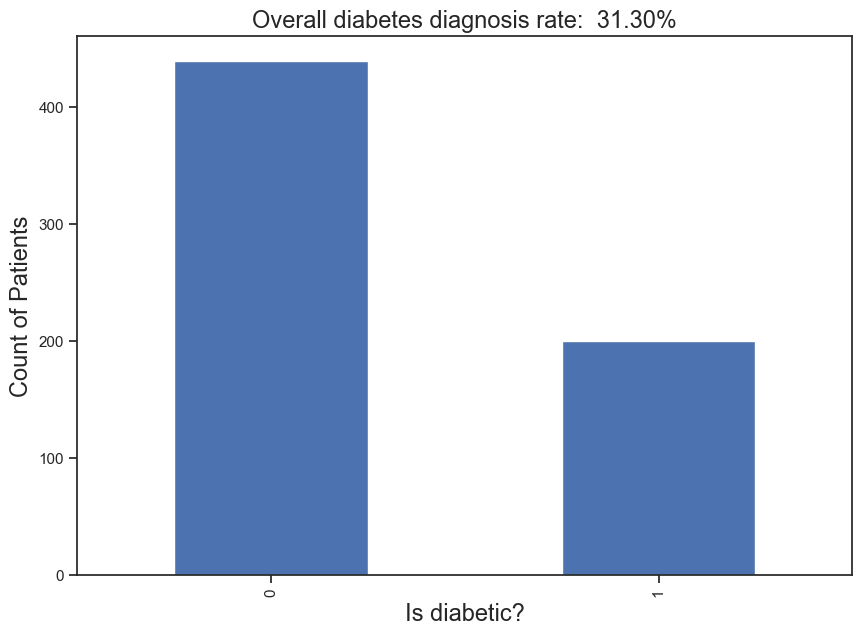

In [58]:
# Visualizing distribution of Y feature (predictive variable)
plt.figure(figsize=(10,7))
df_out.Outcome.value_counts().sort_index().plot.bar()
diabetic_rate = df_out.Outcome.mean()
plt.title(f"Overall diabetes diagnosis rate: {diabetic_rate: .2%}", size=17)
plt.xlabel('Is diabetic?', size=17)
plt.ylabel('Count of Patients', size=17)

# Data Modeling

In [59]:
df.shape


(768, 9)

In [60]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [61]:
# lets extract features and targets
X = df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

In [66]:
#Splitting train test data 80 20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((511, 8), (128, 8), (511,), (128,))

In [72]:
def tn(y_test, y_pred): return confusion_matrix(y_test, y_train)[0,0]
def fp(y_test, y_pred): return confusion_matrix(y_test, y_train)[0,1]
def fn(y_test, y_pred): return confusion_matrix(y_test, y_train)[1,0]
def tp(y_test, y_pred): return confusion_matrix(y_test, y_train)[1,1]

In [73]:
#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score), 'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
          'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

In [80]:
# Perform 2 sample z-test
from statsmodels.stats.weightstats import ztest as ztest
ztest(X_train['BMI'], X_train['Age'], value=0)

(-1.7436230854450159, 0.0812248351142822)

# Implementation of Statistical Hypothesis test using Scipy and Sci-kit

In [81]:
!pip install researchpy
import researchpy as rp

In [82]:
df.groupby("Outcome").agg({"Glucose":[np.mean, np.std, np.size]})

Glucose                
               mean        std size
Outcome                            
0        109.980000  26.141200  500
1        141.257463  31.939622  268

In [84]:
df_glucose = df[['Glucose', 'Outcome']]
df_glucose["Outcome"].replace({1: "Diabetes", 0: "NotDiabetes"}, inplace=True)
df_glucose
# Need to convert 1 and 0 in Outcome column to Diabetes and notDiabetes respectively for further hypothesis testing

Glucose      Outcome
0        148     Diabetes
1         85  NotDiabetes
2        183     Diabetes
3         89  NotDiabetes
4        137     Diabetes
..       ...          ...
763      101  NotDiabetes
764      122  NotDiabetes
765      121  NotDiabetes
766      126     Diabetes
767       93  NotDiabetes

[768 rows x 2 columns]

In [85]:
rp.ttest(group1=df_glucose['Glucose'][df_glucose['Outcome'] == 'Diabetes'], group1_name= "Diabetes",
        group2= df_glucose['Glucose'][df_glucose['Outcome'] == 'NotDiabetes'], group2_name= "NotDiabetes")

(      Variable      N        Mean         SD        SE   95% Conf.    Interval
 0     Diabetes  268.0  141.257463  31.939622  1.951023  137.416116  145.098810
 1  NotDiabetes  500.0  109.980000  26.141200  1.169070  107.683094  112.276906
 2     combined  768.0  120.894531  31.972618  1.153712  118.629722  123.159340,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =    31.2775
 1                   Degrees of freedom =   766.0000
 2                                    t =    14.6001
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     1.1053
 7                            Hedge's g =     1.1042
 8                       Glass's delta1 =     0.9793
 9                     Point-Biserial r =     0.4666)

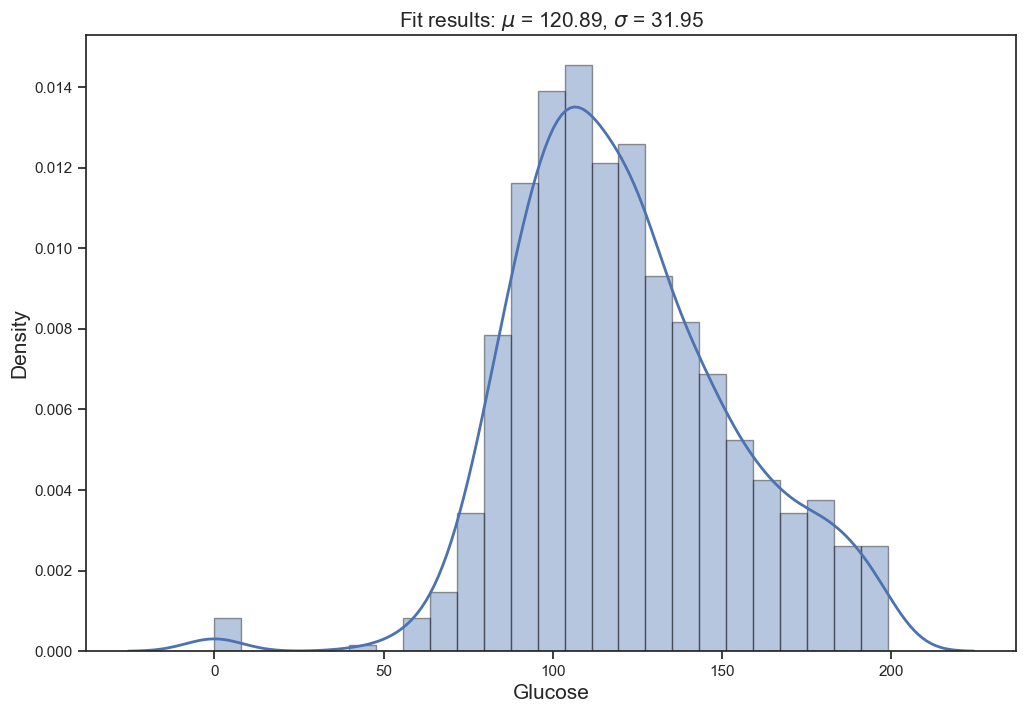

In [87]:
from scipy.stats import norm
mu, std = norm.fit(df_glucose['Glucose'])
plt.figure(figsize=[12, 8])
sns.distplot(df_glucose['Glucose'], hist=True, kde=True,
            bins=25, color ='b',
            hist_kws={'edgecolor': 'black'},
            kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f, $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Glucose", size=15)
plt.ylabel("Density", size=15);


In [89]:
import scipy.stats as st
Mu = 72.4
# Std = ? population standard deviation is unknown

x = df['BloodPressure'] # Storing values in list to avoid long names
est_pop_std = np.sqrt(np.sum(abs(x - x.mean())**2) / (df.size - 1))  #sqrt(sum(xi - xbar)^2 / (n-1))

sample_avg_bp = (df['BloodPressure']).mean()

std_error_bp = est_pop_std / np.sqrt(df.size) # Standard dev of the sampling mean distributation..estimated from population

T_Statistic = (( sample_avg_bp - Mu) / std_error_bp)

pvalue = st.t.sf(np.abs(T_Statistic), df.size-1)*2
print("Estimated Pop Stand Dev", est_pop_std)
print("sample avg BP : ", sample_avg_bp)
print("T Statistic" , T_Statistic)
print("Pval", pvalue)

if pvalue > 0.05:
    print('samples are likely drawn from the distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distribution (reject H0)')

Estimated Pop Stand Dev 6.448200342877043
sample avg BP :  69.10546875
T Statistic -42.47730684802432
Pval 0.0
Samples are likely drawn from different distribution (reject H0)


In [92]:
df_mod = df.copy()
df_mod['BloodPressure'] = df_mod['BloodPressure'].mask(df['BloodPressure'] == 0, df['BloodPressure'].median())

In [93]:
from scipy.stats import ttest_ind

stat, pvalue = ttest_ind(df_mod['BloodPressure'], df['BloodPressure'])
print("compare means", df_mod['BloodPressure'].mean(), df['BloodPressure'].mean())
print("Tstatistic, Pvalue", stat, pvalue)

if pvalue > 0.05:
    print('sample are likely drawn from the distributions (fail to reject H0)')
else:
    print('samples are likely drawn from different distribution (reject H0)')

compare means 72.38671875 69.10546875
Tstatistic, Pvalue 3.983924203237573 7.096423589275456e-05
samples are likely drawn from different distribution (reject H0)


In [94]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [95]:
numerical = df.select_dtypes(include=['int64', 'float']).columns.tolist()
print(numerical)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [96]:
df.describe().T.round(2)

count    mean     std    min    25%     50%     75%  \
Pregnancies               768.0    3.85    3.37   0.00   1.00    3.00    6.00   
Glucose                   768.0  120.89   31.97   0.00  99.00  117.00  140.25   
BloodPressure             768.0   69.11   19.36   0.00  62.00   72.00   80.00   
SkinThickness             768.0   20.54   15.95   0.00   0.00   23.00   32.00   
Insulin                   768.0   79.80  115.24   0.00   0.00   30.50  127.25   
BMI                       768.0   31.99    7.88   0.00  27.30   32.00   36.60   
DiabetesPedigreeFunction  768.0    0.47    0.33   0.08   0.24    0.37    0.63   
Age                       768.0   33.24   11.76  21.00  24.00   29.00   41.00   
Outcome                   768.0    0.35    0.48   0.00   0.00    0.00    1.00   

                             max  
Pregnancies                17.00  
Glucose                   199.00  
BloodPressure             122.00  
SkinThickness              99.00  
Insulin                   846.00  
BMI                        67.10  
DiabetesPedigreeFunction    2.42  
Age                        81.00  
Outcome                     1.00

In [98]:
## importing stats module frm scipy
from scipy import stats

## retrieving p value from normality test function

PregnanciesPVAL=stats.normaltest(df.Pregnancies).pvalue
GlucosePVAL=stats.normaltest(df.Glucose).pvalue
BloodPressurePVAL=stats.normaltest(df.BloodPressure).pvalue
SkinThicknessPVAL=stats.normaltest(df.SkinThickness).pvalue
InsulinPVAL=stats.normaltest(df.Insulin).pvalue
BMIPVAL=stats.normaltest(df.BMI).pvalue
DiaPeFuPVAL=stats.normaltest(df.DiabetesPedigreeFunction).pvalue
AgePVAL=stats.normaltest(df.Age).pvalue

## Printing the values
print('Pregnancies P Value is '+ str(PregnanciesPVAL))
print('Glucose P Value is '+ str(GlucosePVAL))
print('BloodPressure P Value is '+ str(BloodPressurePVAL))
print('Skin Thickness P Value is '+ str(SkinThicknessPVAL))
print('Insulin P Value is '+ str(InsulinPVAL))
print('BMI P Value is '+ str(BMIPVAL))
print('Diabetes Pedigree Function P Value is '+ str(DiaPeFuPVAL))
print('Age P Value is '+ str(AgePVAL))

Pregnancies P Value is 3.9142916387836715e-18
Glucose P Value is 0.0020446506991363502
BloodPressure P Value is 3.780127075543807e-67
Skin Thickness P Value is 0.00017124157678801767
Insulin P Value is 6.895342740914799e-85
BMI P Value is 1.9696869549260572e-19
Diabetes Pedigree Function P Value is 1.2987697487612696e-70
Age P Value is 9.308980038236577e-27


# Regression Analysis

In [109]:
# Lets build the model
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics

from sklearn.metrics import ConfusionMatrixDisplay
model = LogisticRegression(solver='liblinear')

# instantiate the model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

print(model_score)

0.7421875


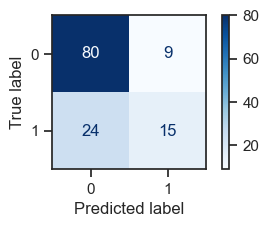

In [111]:
 ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues);
#Confusion

In [112]:
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, y_predict)
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, y_predict)
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, y_predict)
print("F1 Score: %.3f" % f1)

Accuracy: 0.742
Precision: 0.625
Recall: 0.385
F1 Score: 0.476


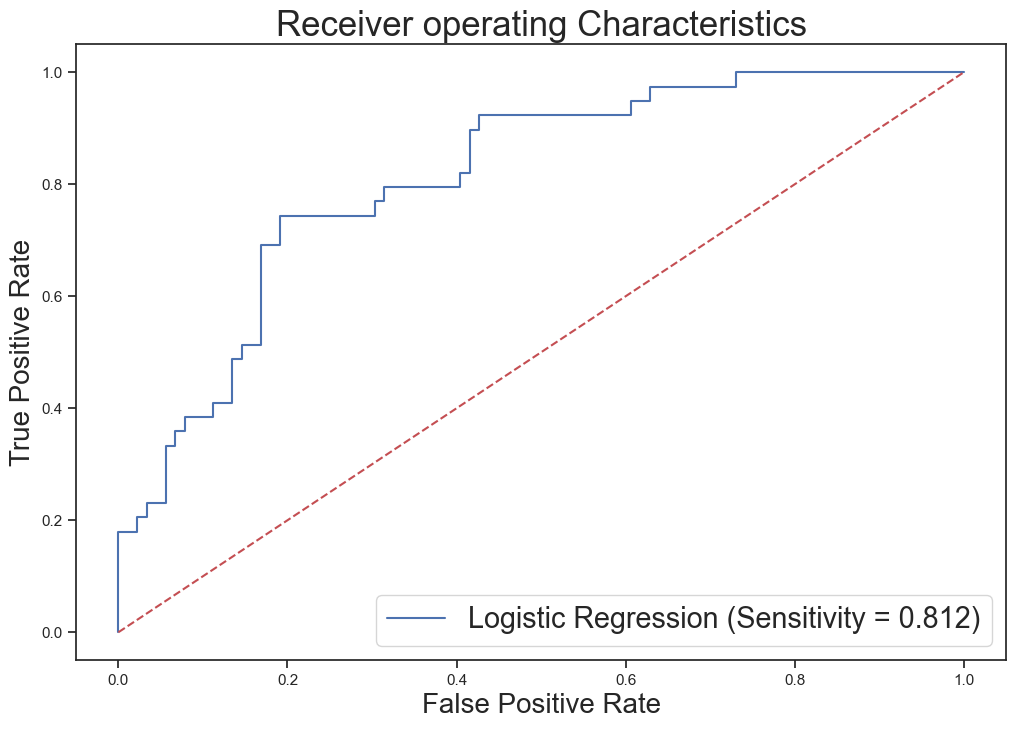

In [113]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size =20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver operating Characteristics", size = 25)
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()

# AUC score from LR is 0.807

In [114]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        89
           1       0.62      0.38      0.48        39

    accuracy                           0.74       128
   macro avg       0.70      0.64      0.65       128
weighted avg       0.73      0.74      0.72       128



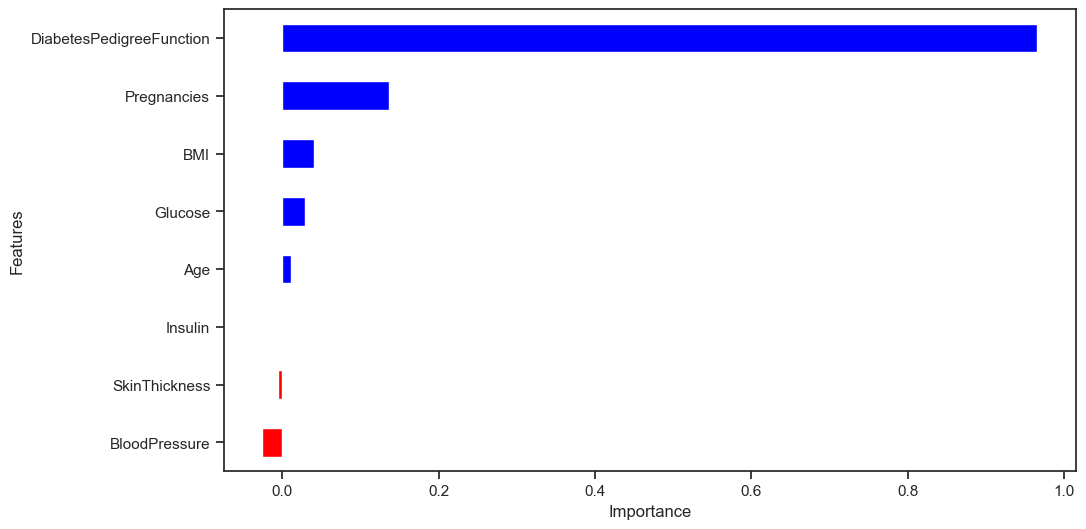

In [115]:
coeff = list(model.coef_[0])
labels = list(X_test.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6), color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance');

# Classification modelling

In [117]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1, 15):
    
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
## Score that come from testing on the same datapoint that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('max train score {} % and k = {}'.format(max_train_score * 100, list(map(lambda x: x + 1, train_scores_ind ))))

max train score 100.0 % and k = [1]


In [118]:
## Score that comes from testing on the dataponts that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('max test score {} % and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind ))))

max test score 78.125 % and k = [7]


In [122]:
# Result Visualization
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1, 15), train_scores, marker='*', label ='Train Score')
p = sns.lineplot(range(1, 15), test_scores, marker='o', label ='Test Score')
# The best result is captured at k = 11 is used for the final model

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1200x500 with 0 Axes>